# Old Faithful Geyser Clustering 실습 (K-Means)
---

이 노트북에서는 Yellowstone에 있는 Old Faithful Geyser(간헐천)의 **분출 시간**과 **다음 분출까지의 대기 시간** 데이터를 이용해 K-Means 클러스터링을 수행합니다.

- **데이터셋 설명**:
  - `eruption duration`: 간헐천의 분출 시간 (분)
  - `waiting time`: 다음 분출까지의 대기 시간 (분)

- **학습 목표**:
  1. 데이터를 시각적으로 탐색
  2. K-Means로 분출 패턴을 2개의 그룹으로 분류
  3. 클러스터 중심 및 분포를 시각화


> 📎 **old_faithful_geyser.csv** 파일을 업로드하세요.  
파일에는 반드시 헤더가 있어야 하며, 첫 줄은 건너뜁니다.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving old_faithful_geyser.csv to old_faithful_geyser (1).csv


> ✅ 이 데이터는 2차원 형태이며, 첫 번째 열은 **분출 시간**, 두 번째 열은 **대기 시간**입니다.

In [ ]:
import numpy as np

# CSV 로드 (첫 줄은 헤더이므로 건너뜀)
data = np.loadtxt("old_faithful_geyser.csv", delimiter=",", skiprows=1)
X = data  # (N, 2)

# 간단히 상위 5개 출력
print("샘플 데이터 (분출 시간, 대기 시간):")
print(X[:5])

: 

> 🔍 위 그래프는 간헐천의 분출 시간과 대기 시간 간의 분포를 보여줍니다.  
대체로 **긴 분출은 긴 대기 시간**, **짧은 분출은 짧은 대기 시간**과 관련 있습니다.


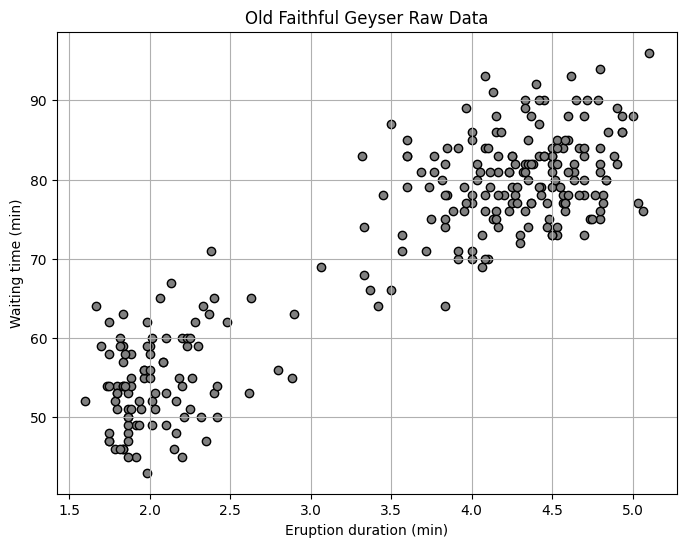

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c='gray', edgecolor='black')
plt.xlabel("Eruption duration (min)")
plt.ylabel("Waiting time (min)")
plt.title("Old Faithful Geyser Raw Data")
plt.grid(True)
plt.show()


 K-Means 클러스터링 (K=2)



In [5]:
from sklearn.cluster import KMeans

# 클러스터 수 2로 지정
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

labels = kmeans.labels_           # 클러스터 레이블 (0 또는 1)
centroids = kmeans.cluster_centers_  # 중심점 좌표


In [6]:
# 클러스터 레이블 확인 (앞 10개)
print("클러스터 레이블 (앞 10개):", labels[:10])

# 클러스터 중심점 출력
print("클러스터 중심점:")
print(centroids)

# SSE 출력
print(f"SSE (Sum of Squared Errors): {kmeans.inertia_:.2f}")


클러스터 레이블 (앞 10개): [1 0 1 0 1 0 1 1 0 1]
클러스터 중심점:
[[ 2.09433    54.75      ]
 [ 4.29793023 80.28488372]]
SSE (Sum of Squared Errors): 8901.77


- `labels`: 각 데이터가 속한 클러스터 번호 (0 또는 1)
- `centroids`: 클러스터 중심점 좌표 (분출 시간, 대기 시간)
- `inertia_`: 모든 포인트가 소속 클러스터 중심과 얼마나 가까운지를 나타내는 척도 (작을수록 좋음)


클러스터링 결과 시각화

In [1]:
plt.figure(figsize=(8,6))

# 클러스터별 색상 시각화
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Accent', s=80, edgecolor='black', label='Points')

# 중심점 시각화
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.xlabel("Eruption duration (min)")
plt.ylabel("Waiting time (min)")
plt.title("K-Means Clustering Result (K=2)")
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'plt' is not defined

> 🔴 두 개의 클러스터가 분명하게 나뉘는 것을 확인할 수 있습니다.
> - 클러스터 0: 짧은 분출 + 짧은 대기
> - 클러스터 1: 긴 분출 + 긴 대기
